In [31]:
# import all necessary packages
from bs4 import BeautifulSoup
from collections import Counter
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np
import operator
import os
import pickle
import pprint
import re
import requests
import urllib, urllib2
from collections import defaultdict
from __future__ import division
from itertools import count
# IPython specifics
%matplotlib inline

In [7]:
corps_link = [
    ('https://en.wikipedia.org/w/index.php?title=List_of_companies_of_the_United_States&action=edit', 'us_corps'),
]

# get all philosopher pages wiki text
all_matches = {
    'all': set()
}

for country in corps_link:
    r = requests.get(country[0])
    soup = BeautifulSoup(r.text, 'html.parser')
    wiki_text = soup.find('textarea').get_text()
    # lines of philosophers start with "*" or "*St."
    # this link in logicians '[[Categoriae decem]]'' wasn't counted
    matches = re.findall(r'(\*\s?|\*\s?St\.\s?)\[\[(.+?)\]\]', wiki_text)
    # only 2nd group with philosopher name
    # remove any lists that can occur in the == See also == section
    m = [x[1].split('|')[0].replace(' ', '_') for x in matches if not re.match(r'list of.*', x[1], re.IGNORECASE)]
    # put in dictonary
    all_matches[country[1]] = m
    all_matches['all'] |= set(m)

pprint.pprint(len(all_matches['us_corps']))

1727


In [11]:
wiki_cat_url="https://en.wikipedia.org/wiki/Category:Lists_of_companies_by_country"
wiki_cat_page=urllib2.urlopen(wiki_cat_url)
wiki_cat_soup = BeautifulSoup(wiki_cat_page.read(), 'html.parser')

wiki_subcats = wiki_cat_soup.find("div", attrs={"id":"mw-subcategories"})
wiki_subcats_lists= wiki_subcats.find_all("div",attrs={"class":"mw-category-group"})

wiki_coutrys = wiki_cat_soup.find("div",attrs={"id":"mw-pages"})
wiki_coutrys_lists= wiki_coutrys.find_all("div",attrs={"class":"mw-category-group"})

country_list_subcat=list()
country_list_page=list()


for wiki_subcats_list in wiki_subcats_lists:
    cat_tag=wiki_subcats_list.find("h3").text
    if cat_tag.isalpha():
        coutry_names_alpha=wiki_subcats_list.find("ul").findAll('a')
        coutry_name_lists=[coutry_name_alpha.text.split('Lists of companies of ')[1] for coutry_name_alpha in coutry_names_alpha]
        country_list_subcat+=coutry_name_lists
        
print "Country list extracted from Subcategory section\n"
pprint.pprint(country_list_subcat)

for wiki_coutrys_list in wiki_coutrys_lists:
    cat_tag=wiki_coutrys_list.find("h3").text
    if cat_tag.isalpha():
        coutry_names_alpha=wiki_coutrys_list.find("ul").findAll('a')
        coutry_name_lists=[coutry_name_alpha.text.split('List of companies of ')[1] for coutry_name_alpha in coutry_names_alpha]
        country_list_page+=coutry_name_lists

print "Country list extracted from \"Lists of companies by country\" \n"
pprint.pprint(country_list_page)


Country list extracted from Subcategory section

[u'Afghanistan',
 u'Albania',
 u'Algeria',
 u'Andorra',
 u'Angola',
 u'Argentina',
 u'Armenia',
 u'Australia',
 u'Austria',
 u'Azerbaijan',
 u'the Bahamas',
 u'Bahrain',
 u'Bangladesh',
 u'Barbados',
 u'Belarus',
 u'Belgium',
 u'Belize',
 u'Benin',
 u'Bermuda',
 u'Bhutan',
 u'Bolivia',
 u'Bosnia and Herzegovina',
 u'Botswana',
 u'Brazil',
 u'Brunei',
 u'Bulgaria',
 u'Burkina Faso',
 u'Burundi',
 u'Cambodia',
 u'Cameroon',
 u'Canada',
 u'Cape Verde',
 u'the Central African Republic',
 u'Chad',
 u'Chile',
 u'China',
 u'Colombia',
 u'the Comoros',
 u'the Democratic Republic of the Congo',
 u'the Republic of the Congo',
 u'Costa Rica',
 u'Croatia',
 u'Cuba',
 u'Cyprus',
 u'the Czech Republic',
 u'Denmark',
 u'Djibouti',
 u'Dominica',
 u'the Dominican Republic',
 u'Ecuador',
 u'Egypt',
 u'El Salvador',
 u'Equatorial Guinea',
 u'Estonia',
 u'Ethiopia',
 u'the Faroe Islands',
 u'Fiji',
 u'Finland',
 u'France',
 u'Gabon',
 u'the Gambia',
 u'Geor

In [67]:
print "Countries that do not have a direct wiki pages of all registerd companies\n"
unwiki_country=list(set(country_list_subcat).union(set(country_list_page))-set(country_list_page))
print unwiki_country

Countries that do not have a direct wiki pages of all registerd companies

[u'the Solomon Islands', u'Tonga', u'Yemen', u'Samoa', u'Ivory Coast', u'Uruguay', u'Fiji', u'the Maldives', u'Kyrgyzstan', u'Moldova', u'the Gambia', u'Suriname', u'the United Kingdom', u'Paraguay', u'Bolivia', u'Tajikistan', u'Ecuador', u'Madadascar']


In [276]:
coutry_extend_urls=list()
for wiki_coutrys_list in wiki_coutrys_lists:
    coutry_links=wiki_coutrys_list.find("ul").findAll('a')
    coutry_link_extend=[coutry_link.get("href").split("/wiki/")[1] for coutry_link in coutry_links]
    coutry_extend_urls+=coutry_link_extend
print "links to wiki pages of countries with all registerd noteable companies\n"
pprint.pprint(coutry_extend_urls)
pprint.pprint(len(coutry_extend_urls))

links to wiki pages of countries with all registerd noteable companies

[u'List_of_companies_of_Abkhazia',
 u'List_of_companies_of_Afghanistan',
 u'List_of_companies_of_Albania',
 u'List_of_companies_of_Algeria',
 u'List_of_companies_of_Andorra',
 u'List_of_companies_of_Angola',
 u'List_of_companies_of_Anguilla',
 u'List_of_companies_of_Antigua_and_Barbuda',
 u'List_of_companies_of_Argentina',
 u'List_of_companies_of_Armenia',
 u'List_of_companies_of_Australia',
 u'List_of_companies_of_Austria',
 u'List_of_companies_of_Azerbaijan',
 u'List_of_companies_of_the_Bahamas',
 u'List_of_companies_of_Bahrain',
 u'List_of_companies_of_Bangladesh',
 u'List_of_companies_of_Barbados',
 u'List_of_companies_of_Belarus',
 u'List_of_companies_of_Belgium',
 u'List_of_companies_of_Belize',
 u'List_of_companies_of_Benin',
 u'List_of_companies_of_Bermuda',
 u'List_of_companies_of_Bhutan',
 u'List_of_companies_of_Bosnia_and_Herzegovina',
 u'List_of_companies_of_Botswana',
 u'List_of_companies_of_Brazil',
 

In [285]:
companies_dict = defaultdict(dict) #companies default dict...

wiki_base_edit_url="https://en.wikipedia.org/w/index.php?title="
wiki_base_page_url="https://en.wikipedia.org/wiki/"

com_col_dict=["name","registered name","company name","company","english"] #possible column names
for country_name, coutry_extend_url in zip(country_list_page,coutry_extend_urls):
    inds_list=list() #indust areas
    coms_list=list()
    
    full_edit_url = wiki_base_edit_url+coutry_extend_url+"&action=edit"
    full_page_url = wiki_base_page_url+coutry_extend_url

    r_edit = requests.get(full_edit_url)
    r_page = requests.get(full_page_url)
    
    soup_edit = BeautifulSoup(r_edit.text, 'html.parser')
    soup_page = BeautifulSoup(r_page.text, 'html.parser')
    
    com_tables=soup_page.find_all("table", attrs={"class":re.compile('wikitable.*')})
    com_div=soup_page.find("div", attrs={"id":"mw-content-text"})
           
    if len(com_tables): # countries that have company in table on their homepages
        print "\n EXCEPTION FORMAT PAGE:"+country_name+" has their companies saved in a table on home page"
        for com_table in com_tables:
            table_cols=com_table.find("tr").text.strip().lower().split('\n')
            com_col=(set(com_col_dict) & set(table_cols)).pop()
            com_col_index=table_cols.index(com_col)
            for row in com_table.find_all("tr")[1:]:
                if len(row.find_all('td'))<=com_col_index:
                    continue
                elif row.find_all('td')[com_col_index].find('a') and row.find_all('td')[com_col_index].find('a').parent.name!="sup": #there are none-link rows                   
                    com_td = row.find_all('td')[com_col_index].find('a')
                    com_name = com_td.text.split("|")[0].replace(' ', '_')
                    companies_dict[com_name]['Country']=country_name
    
    else: #countries have company in list
        print "\n REGULAR FORMAT PAGE:"+country_name+" has their companies saved in a list on home page"
        wiki_text = soup_edit.find('textarea').get_text()
        matches = re.findall(r'(\*\s?)\[\[(.+?)\]\]', wiki_text)
        
        for x in matches:
            if "List of" not in x[1] and "Economy of" not in x[1] and "Companies of" not in x[1]:
                com_name=x[1].split("|")[0].replace(' ', '_')
                companies_dict[com_name]['Country']=country_name

pprint.pprint(companies_dict)

    #else: #countries have company in list
        
    
    
    #wiki_text = soup_edit.find('textarea').get_text()
    #matches = re.findall(r'([\*\s\|]*)\[\[(.+?)\]\]', wiki_text)
    
    #break
    #matches = re.findall(r'(\*\s?|\*\s?St\.\s?)\[\[(.+?)\]\](.+?)', wiki_text)
    
    #m = [x[1].split('|')[0].replace(' ', '_') for x in matches]
    # put in dictonary
    #countries_dict[country_name]=m
    #countries_dict['all']|=set(m)




 REGULAR FORMAT PAGE:Abkhazia has their companies saved in a list on home page

 REGULAR FORMAT PAGE:Afghanistan has their companies saved in a list on home page

 REGULAR FORMAT PAGE:Albania has their companies saved in a list on home page

 REGULAR FORMAT PAGE:Algeria has their companies saved in a list on home page

 REGULAR FORMAT PAGE:Andorra has their companies saved in a list on home page

 REGULAR FORMAT PAGE:Angola has their companies saved in a list on home page

 REGULAR FORMAT PAGE:Anguilla has their companies saved in a list on home page

 REGULAR FORMAT PAGE:Antigua and Barbuda has their companies saved in a list on home page

 REGULAR FORMAT PAGE:Argentina has their companies saved in a list on home page

 REGULAR FORMAT PAGE:Armenia has their companies saved in a list on home page

 REGULAR FORMAT PAGE:Australia has their companies saved in a list on home page

 REGULAR FORMAT PAGE:Austria has their companies saved in a list on home page

 REGULAR FORMAT PAGE:Azerbaija

In [286]:
dict_len= len(companies_dict.keys())
print "{0} noteable Companies in WIKI".format(dict_len)

12638 noteable Companies in WIKI


### 2. Save contents of each company page in another dict ###

In [5]:
#make working directory
directory = os.getcwd()+'/companies_dictionary'
if not os.path.exists(directory):
    os.makedirs(directory)

In [290]:
# wikipedia API parameters
baseurl = "https://en.wikipedia.org/w/api.php"
action = "action=query"
content = "prop=revisions&rvprop=content"
dataformat = "format=json"

# get content key: company name, value: json
for com_name in companies_dict.keys():
    # replace special cahrs in philosopher name with URL encoded
    title = 'titles={0}'.format(urllib.quote(com_name.encode('utf-8')))
    # concatenate wikipedia query
    url = '{0}?{1}&{2}&{3}&{4}'.format(baseurl, action, title, content, dataformat)
    r = requests.get(url)
    companies_dict[com_name]['Countent']=r.text

# store company data in one small binary file
with open('{0}/dat.pkl'.format(directory), 'wb') as f:
    pickle.dump(companies_dict, f)


### 3. Construct the company network ###

In [23]:
# load data dictionary
with open('{0}/dat.pkl'.format(directory), 'rb') as f:
    com_dat_dict = pickle.load(f)

# create one node per philosopher name (keys of data)
p_graph = nx.DiGraph()


In [24]:
# create node links
for p in com_dat_dict.keys():
    p_country = com_dat_dict[p]['Country']
    p_content = com_dat_dict[p]['Countent']
    # find all wiki links in the content
    p_links = re.findall(r'\[\[(.+?)\]\]', p_content)
    # list with all outgoing links for edges
    # decode unicode chars and clean the link for matching
    out_links = [l.decode('unicode-escape').split('|')[0].replace(' ', '_') for l in p_links]

    # add a node for the company
    p_graph.add_node(p,Country=p_country)
    # intersection between all companies and found links in article
    all_edges = set(com_dat_dict.keys()).intersection(out_links)
    # show example of related company
    if p == 'Apple_Inc.':
        print all_edges    
    
    # add an edge for the company
    for e in all_edges:
        p_graph.add_edge(p, e)

set([u'Nokia', u'IBM', u'Istanbul', u'Anobit', u'Foxconn', u'Ford_Motor_Company', u'Dell', u'Sun_Microsystems', u'John_Wiley_&_Sons', u'Tesla_Motors', u'CNET', u'PrimeSense', u'LG_Chem', u'AOL', u'Xerox', u'Toshiba', u'Maxim_Integrated', u'Inventec', u'Nike,_Inc.', u'Motorola', u'Intel', u'Netflix', u'Samsung_Electronics', u'FileMaker_Inc.', u'Johnson_Controls', u'Omnicom_Group', u'Microsoft', u'Google', u'Time_Warner', u'Twitter', u'Macromedia', u'Verizon_Wireless', u'The_Coca-Cola_Company', u'Uber_(company)', u'Panasonic'])


In [25]:
print "There are {0} nodes in the network".format(len(p_graph.nodes()))
print "There are {0} edges in the network".format(len(p_graph.edges()))

There are 12638 nodes in the network
There are 27025 edges in the network


In [35]:
# draw countries with different colors
com_color_dict=dict()
print "Number of color used in the plot : {0}".format(len(country_list_page))


coutry_attr_list = set(nx.get_node_attributes(p_graph,'Country').values())
mapping = dict(zip(sorted(coutry_attr_list),count()))
nodes = p_graph.nodes()
colors = [mapping[p_graph.node[n]['Country']] for n in nodes]


Number of color used in the plot : 174


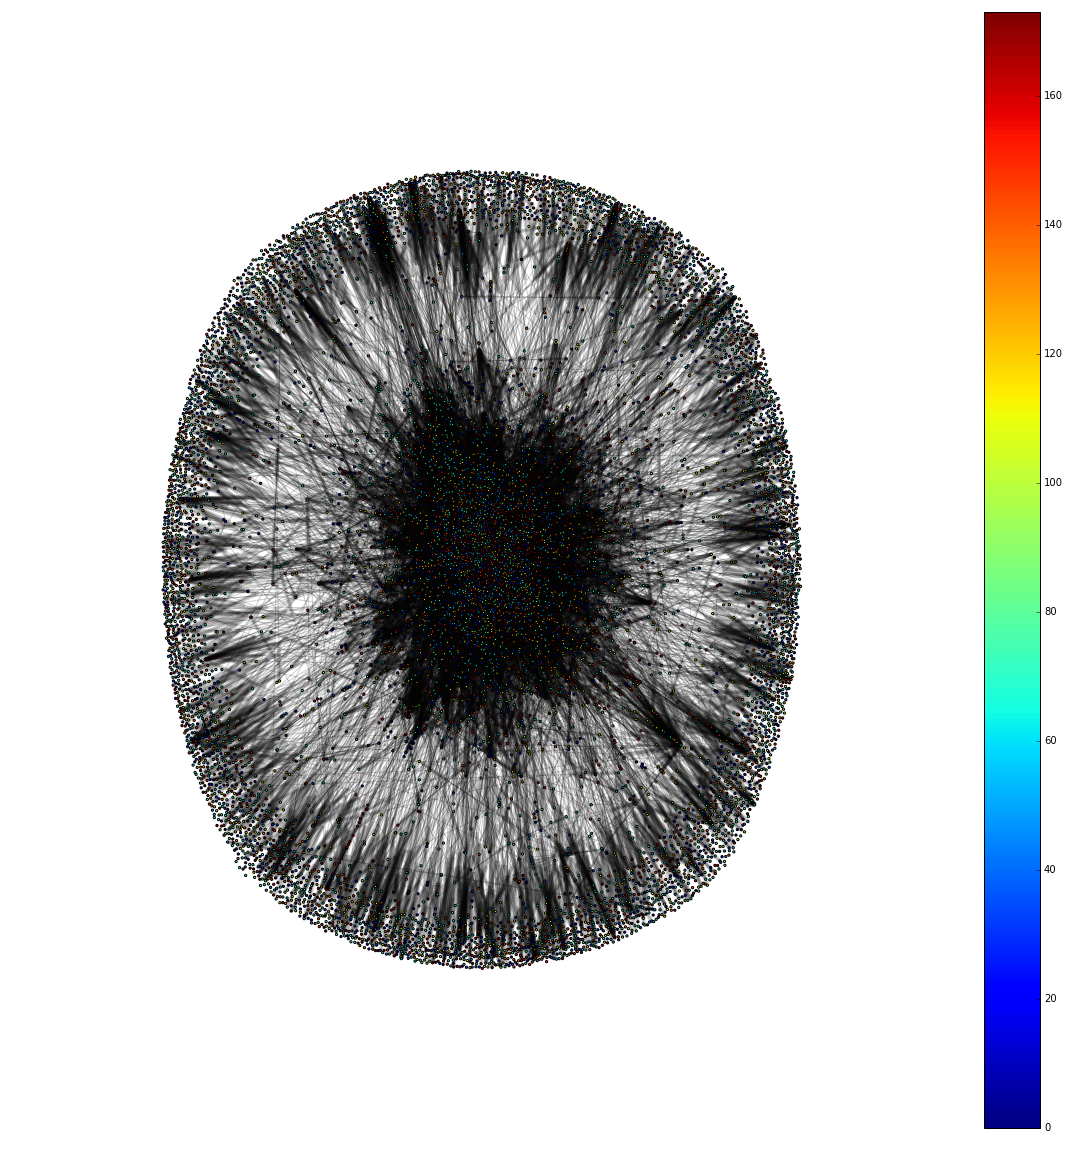

In [37]:
plt.figure(num=None, figsize=(20, 20), dpi=1200)
pos = nx.spring_layout(p_graph)
ec = nx.draw_networkx_edges(p_graph, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(p_graph, pos, nodelist=nodes, node_color=colors, 
                            with_labels=False, node_size=5, width=0.1,cmap=plt.cm.jet)

plt.colorbar(nc)
plt.axis('off')
plt.show()